In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

In [0]:
#Defining model specifications
learning_rate = 0.0003
act_layers = [tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.softmax]
neurons = [1024, 1024, 1024, 1024, 1024, 10]
num_layers = len(act_layers)
batch_size = 1000
total_train_images = np.shape(mnist.train.images)[0]

In [0]:
#Generating a deep network of n layers with specific activation functions
#and specified number of neurons in each layer
def getModel(x , act_layers , neurons , u_weights , v_bar_weights , last_layer_weight):
    num_layers = len(act_layers)
    layers = [0]*num_layers
    
    if u_weights and v_bar_weights:
      for i in range(0 , num_layers):        
        if i == 0:
            u_index = i // 2
            kernel_weight = tf.constant_initializer(u_weights[u_index].eval())
            layers[i] = tf.layers.dense(x , units= neurons[i] , activation=act_layers[i] , kernel_initializer=kernel_weight)   
            
        elif i < num_layers-1:
          if i % 2 == 0:
            u_index = i // 2
            kernel_weight = tf.constant_initializer(u_weights[u_index].eval())
            layers[i] = tf.layers.dense(layers[i-1] , units= neurons[i] , activation=act_layers[i] , kernel_initializer=kernel_weight)
            
          else:
            v_index = i // 2
            kernel_weight = tf.constant_initializer(v_bar_weights[v_index].eval())
            layers[i] = tf.layers.dense(layers[i-1] , units= neurons[i] , activation=act_layers[i] , kernel_initializer=kernel_weight)
            
        else:
            kernel_weight = tf.constant_initializer(last_layer_weight.eval())
            layers[i] = tf.layers.dense(layers[i-1] , units= neurons[i] , activation=act_layers[i] , kernel_initializer=kernel_weight)
    else:
      for i in range(0 , num_layers):        
          if i == 0:
              layers[i] = tf.layers.dense(x , units= neurons[i] , activation=act_layers[i])        
          elif i < num_layers-1:
              layers[i] = tf.layers.dense(layers[i-1] , units= neurons[i] , activation=act_layers[i])
          else:
              layers[i] = tf.layers.dense(layers[i-1] , units= neurons[i] , activation=act_layers[i])
    
    return layers

In [5]:
#Creating placeholders for input and output
input = tf.placeholder(tf.float32, [None, 784])
labels = tf.placeholder(tf.float32, [None, 10])

#Getting the DNN model
u_weights = []
v_bar_weights = []
last_layer_weight = []
output = getModel(input, act_layers, neurons, u_weights , v_bar_weights , last_layer_weight)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#Defining the loss function along with its optimizer
loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits = output[num_layers - 1], labels = labels)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)
correct_prediction = tf.equal(tf.argmax(output[num_layers - 1], 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Training step
Code execution will stop when 98% accuracy is achieved else when 200 epochs are computed.

In [7]:
#Creating Interactivesession
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

flag = True
count = 1

#Training
while flag:
  #Training the model in batches of size 500
   for i in range(total_train_images // batch_size):      
       
      input_batch, labels_batch = mnist.train.next_batch(batch_size)
      feed_dict = {input: input_batch, labels: labels_batch}

      train_step.run(feed_dict=feed_dict)
      
   #Testing
   #Calculating the test accuracy 
   test_x , test_y = mnist.test.next_batch(10000)
   test_accuracy = accuracy.eval(feed_dict={input: test_x, labels: test_y})
   print("Epoch %d, testing accuracy %g"%(count, test_accuracy))
    
  #Once training accuracy reaches 98%, training is stopped
   if test_accuracy >= 0.98 or count >= 200:
       flag = False
  
   count += 1

Epoch 1, testing accuracy 0.9237
Epoch 2, testing accuracy 0.9464
Epoch 3, testing accuracy 0.959
Epoch 4, testing accuracy 0.9645
Epoch 5, testing accuracy 0.967
Epoch 6, testing accuracy 0.9703
Epoch 7, testing accuracy 0.9717
Epoch 8, testing accuracy 0.9729
Epoch 9, testing accuracy 0.9729
Epoch 10, testing accuracy 0.9737
Epoch 11, testing accuracy 0.9764
Epoch 12, testing accuracy 0.9726
Epoch 13, testing accuracy 0.9776
Epoch 14, testing accuracy 0.976
Epoch 15, testing accuracy 0.9783
Epoch 16, testing accuracy 0.9773
Epoch 17, testing accuracy 0.9772
Epoch 18, testing accuracy 0.98


Extracting variables like weights and bias from the trained model

In [0]:
variables = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)

In [9]:
variables

[<tf.Variable 'dense/kernel:0' shape=(784, 1024) dtype=float32_ref>,
 <tf.Variable 'dense/bias:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'dense_1/kernel:0' shape=(1024, 1024) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'dense_2/kernel:0' shape=(1024, 1024) dtype=float32_ref>,
 <tf.Variable 'dense_2/bias:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'dense_3/kernel:0' shape=(1024, 1024) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'dense_4/kernel:0' shape=(1024, 1024) dtype=float32_ref>,
 <tf.Variable 'dense_4/bias:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'dense_5/kernel:0' shape=(1024, 10) dtype=float32_ref>,
 <tf.Variable 'dense_5/bias:0' shape=(10,) dtype=float32_ref>]

In [0]:
#Creating separate list of all weights and bias
W_l = []
b_l = []

for i in range(0 , len(variables) , 2):
  W_l.append(variables[i])
  b_l.append(variables[i+1])

In [0]:
"""
Computing SVD of a given matrix
tf.svd(matrix) returns N singular values
It is then converted into a diagonal matrix of N*N
"""

def compute_SVD(X):
  s, u, v = tf.svd(X)
  
  s_diag = tf.linalg.diag(s)
  
  return s_diag, u, v

def compute_W_bar(s, u, v):
  v_bar = tf.matmul(s, v, adjoint_b=True)
  result = tf.matmul(u, v_bar)
  
  return result , v_bar

In [0]:
"""
Creating a list of:
S - Singular values
U - Left singular values
V - Right singular values

for all W matrix except the last one since its a small matrix
so there is no need to compute SVD for that matrix
"""
s_l = []
u_l = []
v_l = []
for i in range(0 , len(W_l) - 1):
  s, u, v = compute_SVD(W_l[i])
  
  s_l.append(s)
  u_l.append(u)
  v_l.append(v)

In [0]:
#Selecting 'D' significant singular values to reduce the dimensionality
D = [10, 20, 50, 100, 200, 'DFull']

In [0]:
"""
W_bar - Approximation of the original weight matrix. It is calculated using U.S.V
s_d - Selecting D significant singular values
u_d - Selecting D significant left singular values
v_d - Selecting D significant right singular values
v_bar = Dot product of S and V
"""

W_bar_l = []
s_d_list = []
u_d_list = []
v_d_list = []
v_bar_list = []

for d_val in D:
  for j in range(0, len(W_l) - 1):
    if d_val == 'DFull':
      s_d = s_l[j][: , :]
      u_d = u_l[j][: , :]
      v_d = v_l[j][: , :]
    else:
      s_d = s_l[j][:d_val , :d_val]
      u_d = u_l[j][: , :d_val]
      v_d = v_l[j][: , :d_val]
        
    s_d_list.append(s_d)
    u_d_list.append(u_d)
    v_d_list.append(v_d)
    
    result , v_bar = compute_W_bar(s_d , u_d , v_d)
    
    W_bar_l.append(result)
    v_bar_list.append(v_bar)

In [0]:
def feedforward(input , activation_layer , weights , biases , last_layer_weight):
  result = []
  n = len(weights)
  for i in range(0 , n+1):
    if i == 0:
      temp = activation_layer[i](tf.matmul(input , weights[i]) + biases[i])
    elif i < n:
      temp = activation_layer[i](tf.matmul(result[i-1] , weights[i]) + biases[i])
    else:
      temp = activation_layer[i](tf.matmul(result[i-1] , last_layer_weight) + biases[i])
    
    result.append(temp)
   
  return result

In [0]:
def calculate_accuracy(x , y):
  count_equal_values = tf.equal(tf.argmax(x, 1), tf.argmax(y, 1))
  answer = count_equal_values.eval()
  
  count = 0
  for i in range(len(answer)):
    if answer[i] == True:
      count+=1      
  
  return count

In [17]:
accuracy_list = []
for i in range(0 , len(W_bar_l) , 5):
  ff_output = feedforward(test_x , act_layers , W_bar_l[i : i+5] , b_l , W_l[5])
  accuracy = calculate_accuracy(ff_output[-1] , test_y)
  accuracy = accuracy/test_y.shape[0]
  
  accuracy_list.append(accuracy)
  print('Accuracy for D: ' + str(D[int(i/5)]) + ' is '+ str(accuracy))

Accuracy for D: 10 is 0.712
Accuracy for D: 20 is 0.8759
Accuracy for D: 50 is 0.9449
Accuracy for D: 100 is 0.9566
Accuracy for D: 200 is 0.9692
Accuracy for D: DFull is 0.98


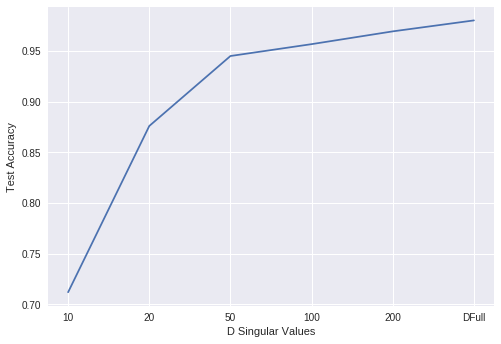

In [18]:
plt.plot(D , accuracy_list)
plt.xlabel('D Singular Values')
plt.ylabel('Test Accuracy')
plt.show()

# Creating new model for training

Since the previous model had large weight matrices, we use those trained weight matrices as a starting point for the new model. \\
We replace the 5 hidden layer with 10 layers where each weight matrix(except the last one) is replaced by U and V_bar. \\
Accuracy should start at a good rate because we are using the trained values in our new model.

In [0]:
#Defining model specifications
new_learning_rate = 0.0003
new_act_layers = [tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.softmax]
new_neurons = [20, 1024, 20, 1024, 20, 1024, 20, 1024, 20, 1024, 10]
new_num_layers = len(new_act_layers)
new_batch_size = 1000
total_train_images = np.shape(mnist.train.images)[0]

In [0]:
"""
Considering D = 20 and thus only taking matrices from U_d and V_bar
for which D = 20 and also the last layer weight
"""
new_output = getModel(input, new_act_layers, new_neurons , u_d_list[5 : 10] , v_bar_list[5 : 10] , W_l[-1])

In [0]:
#Defining the loss function along with its optimizer
new_loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits = new_output[new_num_layers - 1], labels = labels)
new_train_step = tf.train.AdamOptimizer(new_learning_rate).minimize(new_loss)
new_correct_prediction = tf.equal(tf.argmax(new_output[new_num_layers - 1], 1), tf.argmax(labels, 1))
new_accuracy = tf.reduce_mean(tf.cast(new_correct_prediction, tf.float32))

In [22]:
sess.run(tf.global_variables_initializer())

flag = True
count = 1

#Training
while flag:
  #Training the model in batches of size 500
   for i in range(total_train_images // new_batch_size):      
       
      input_batch, labels_batch = mnist.train.next_batch(new_batch_size)
      feed_dict = {input: input_batch, labels: labels_batch}

      new_train_step.run(feed_dict=feed_dict)
      
   #Testing
   #Calculating the test accuracy 
   test_x , test_y = mnist.test.next_batch(10000)
   new_test_accuracy = new_accuracy.eval(feed_dict={input: test_x, labels: test_y})
   print("Epoch %d, testing accuracy %g"%(count, new_test_accuracy))
    
  #Once training accuracy reaches 98%, training is stopped
   if new_test_accuracy >= 0.97 or count >= 200:
       flag = False
  
   count += 1

Epoch 1, testing accuracy 0.695
Epoch 2, testing accuracy 0.7983
Epoch 3, testing accuracy 0.8487
Epoch 4, testing accuracy 0.8566
Epoch 5, testing accuracy 0.861
Epoch 6, testing accuracy 0.8664
Epoch 7, testing accuracy 0.8663
Epoch 8, testing accuracy 0.8699
Epoch 9, testing accuracy 0.8686
Epoch 10, testing accuracy 0.8728
Epoch 11, testing accuracy 0.8723
Epoch 12, testing accuracy 0.9383
Epoch 13, testing accuracy 0.9531
Epoch 14, testing accuracy 0.9566
Epoch 15, testing accuracy 0.9556
Epoch 16, testing accuracy 0.9623
Epoch 17, testing accuracy 0.9621
Epoch 18, testing accuracy 0.9624
Epoch 19, testing accuracy 0.9619
Epoch 20, testing accuracy 0.9624
Epoch 21, testing accuracy 0.9641
Epoch 22, testing accuracy 0.9664
Epoch 23, testing accuracy 0.9629
Epoch 24, testing accuracy 0.9621
Epoch 25, testing accuracy 0.9635
Epoch 26, testing accuracy 0.9671
Epoch 27, testing accuracy 0.9652
Epoch 28, testing accuracy 0.9654
Epoch 29, testing accuracy 0.9643
Epoch 30, testing accurac